# Name : Maria Anson
## NUID : 002931419

a)Write a code in Python that takes as input a training dataset {(xi,yi)}i=1N, a testing set
{(x′i)}N′ and the choice of the kernel function (linear, RBF, polynomial) and outputs the clas- i=1
sification accuracy on the training data and the classification accuracy on the test data.

In [96]:
import scipy.io
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.svm import SVC

In [106]:
def classification_accuracy(actual, prediction):
    true_positives = sum(actual==prediction)
    return np.round(true_positives/actual.shape[0],6)

def print_model_metrics(name, model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)
    print(f"---------------------------------{name}---------------------------------")
    print("Train accuracy : ",classification_accuracy(y_train, y_train_pred))
    print("Test accuracy : ",classification_accuracy(y_test, y_test_pred))
    
def print_data(name, model, X_train, y_train, X_test, y_test):
    plt.scatter(X_train[:,0], X_train[:,1], marker='o', c='green')

    colors = {0:'red', 1:'blue'}
    y_pred = model.predict(X_test)
    for output,color in colors.items():
        y_pred_in_this_class = y_pred[y_pred==output]
        X_test_in_this_class = X_test[y_pred==output]
        plt.scatter(X_test_in_this_class[:,0], X_test_in_this_class[:,1], marker='x', c=color)

    plt.legend(["Train", "Test 0 prediction", "Test +1 prediction"], loc ="upper right")
    plt.title(name+" plot")
    plt.show()

def homework3_script(X_train, y_train, X_test, y_test):
    
    y_train = y_train.reshape(-1)
    y_test = y_test.reshape(-1)

    print(f"The dimension of the training dataset is {X_train.shape} with {X_train.shape[0]} rows and {X_train.shape[1]} columns")
    print(f"The dimension of the training truth label is {y_train.shape} with {y_train.shape[0]} rows")
    print(f"The dimension of the testing dataset is {X_test.shape} with {X_test.shape[0]} rows and {X_test.shape[1]} columns")
    print(f"The dimension of the testing truth label is {y_test.shape} with {y_test.shape[0]} rows")
    
    model_linear = SVC(kernel='linear')
    model_rbf = SVC(kernel='rbf')
    model_poly = SVC(kernel='poly')

    model_linear.fit(X_train, y_train)
    model_rbf.fit(X_train, y_train)
    model_poly.fit(X_train, y_train)

    print_model_metrics("Linear kernel", model_linear, X_train, y_train, X_test, y_test)
    print_model_metrics("RBF kernel", model_rbf, X_train, y_train, X_test, y_test)
    print_model_metrics("Polynomial kernel", model_poly, X_train, y_train, X_test, y_test)

    print_data("Linear kernel", model_linear, X_train, y_train, X_test, y_test)
    print_data("RBF kernel", model_rbf, X_train, y_train, X_test, y_test)
    print_data("Polynomial kernel", model_poly, X_train, y_train, X_test, y_test)

The dimension of the training dataset is (126, 2) with 126 rows and 2 columns
The dimension of the training truth label is (126,) with 126 rows
The dimension of the testing dataset is (14, 2) with 14 rows and 2 columns
The dimension of the testing truth label is (14,) with 14 rows
---------------------------------Linear kernel---------------------------------
Train accuracy :  0.968254
Test accuracy :  0.928571
---------------------------------RBF kernel---------------------------------
Train accuracy :  0.968254
Test accuracy :  0.928571
---------------------------------Polynomial kernel---------------------------------
Train accuracy :  0.968254
Test accuracy :  1.0


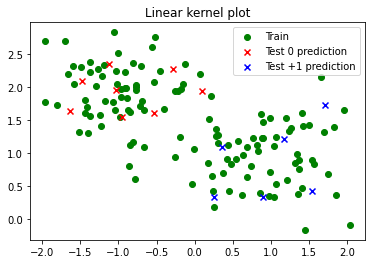

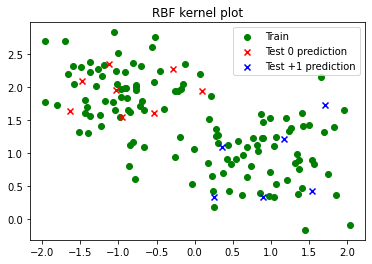

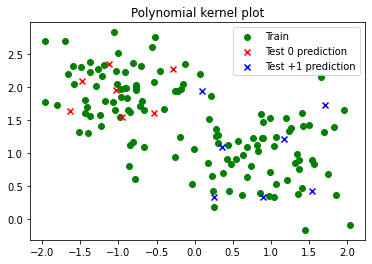

In [107]:
file = scipy.io.loadmat("dataset1.mat")
homework3_script(file['X_trn'],file['Y_trn'],file['X_tst'],file['Y_tst'])

c) Run the code on the training dataset 2 for different kernels and report the accuracy on the training and the test datasets for each kernel choice. Plot the training data with green ’o’ symbols and in the same plot, show the testing data with ’x’ symbols with red if predicted in class -1 and with blue if predicted in class +1.

The dimension of the training dataset is (1000, 2) with 1000 rows and 2 columns
The dimension of the training truth label is (1000,) with 1000 rows
The dimension of the testing dataset is (1000, 2) with 1000 rows and 2 columns
The dimension of the testing truth label is (1000,) with 1000 rows
---------------------------------Linear kernel---------------------------------
Train accuracy :  0.976
Test accuracy :  0.977
---------------------------------RBF kernel---------------------------------
Train accuracy :  1.0
Test accuracy :  1.0
---------------------------------Polynomial kernel---------------------------------
Train accuracy :  0.926
Test accuracy :  0.916


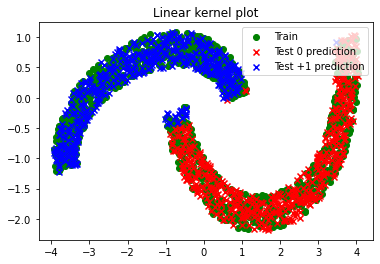

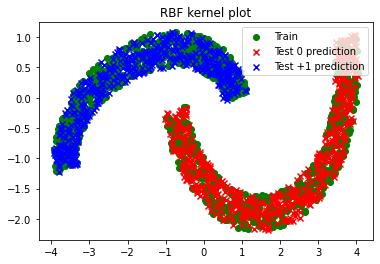

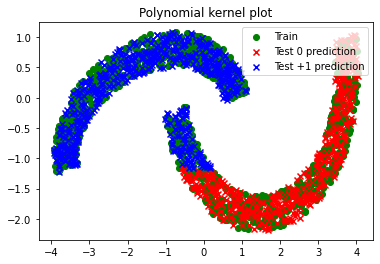

In [108]:
file = scipy.io.loadmat("dataset2.mat")
file['ytrain'][file['ytrain'].reshape(-1)==-1] = 0
file['ytest'][file['ytest'].reshape(-1)==-1] = 0
homework3_script(file['xtrain'],file['ytrain'],file['xtest'],file['ytest'])